In [1]:
import pandas as pd
import json
import os
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
# sns.set(style='ticks', context='paper', font='CMU Sans Serif')
sns.set(style='ticks', context='paper')
from collections import defaultdict
import numpy as np
from util import plot_cdf

ModuleNotFoundError: No module named 'altair'

In [2]:
save_path="/data2/lichenni/ns3"
file2matrix = {
        '../../workload/spatials/cluster_a.json': 'Traffic Matrix A',
        '../../workload/spatials/cluster_b.json': 'Traffic Matrix B',
        '../../workload/spatials/cluster_c.json': 'Traffic Matrix C',
    }
file2oversub = {
        'spec/cluster_1_to_1.json': '1-to-1',
        'spec/cluster_2_to_1.json': '2-to-1',
        'spec/cluster_4_to_1.json': '4-to-1',
    }

# of paths: 29862531


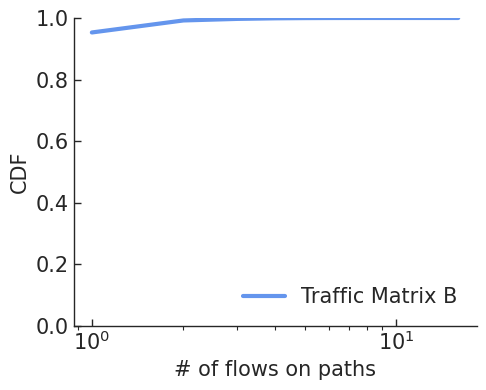

In [4]:
res={}
mix_file = '../spec/2.mix.json'
with open(mix_file) as f:
    mix = json.load(f) 
    mix_id = mix['id']
    mix_dir = f'../data/{mix_id}'
    traffic_mat=file2matrix[mix['spatial']]
    # Accuracy metrics
    file_path_to_flowId=f'{save_path}/path_to_flowId_{mix_id}_fig7.npz'
    if not os.path.exists(file_path_to_flowId):
        path_to_flowid={}
        with open(f'{mix_dir}/mlsys/path_to_flows.txt', 'r') as file:
            for line_idx,line in enumerate(file):
                parts = line.strip().split(':')

                # Extract the ranges part (before ':') and the numbers part (after ':')
                path, numbers_part = parts[0], parts[1]

                flowid_list = [int(x) for x in numbers_part.split(',')]
                
                path_to_flowid[path]=flowid_list
        np.savez(file_path_to_flowId, path_to_flowid=path_to_flowid)

    else:
        data=np.load(file_path_to_flowId, allow_pickle=True)
        path_to_flowid=data['path_to_flowid'].item()
                
    print("# of paths:", len(path_to_flowid))
    res[f"{traffic_mat}"]=np.array([len(path_to_flowid[key]) for key in path_to_flowid])
legend_list=list(res.keys())
val=[np.array(res[key]) for key in res] 
plot_cdf(val,None,legend_list,'# of flows on paths',legend_font=15,group_size=4,loc=4,rotate_xaxis=False,log_switch=True)